## Task 1

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree
- deep decision tree
- random forest on small trees
- random forest on deep trees

In [1]:
# import library 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/olesya/Documents/Master_degree/TML/MLT-03 - Supervised learning algorithms/bioresponse.csv')

In [2]:
data.shape

(3751, 1777)

In [3]:
X = data.drop('Activity', axis=1)
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# Small decision tree
small_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
small_tree.fit(X_train, y_train)
st_pred = small_tree.predict(X_test)
st_probpred = small_tree.predict_proba(X_test)[:, 1]

# Deep decision tree
deep_tree = DecisionTreeClassifier(random_state=42, max_depth=25)
deep_tree.fit(X_train, y_train)
dt_pred = deep_tree.predict(X_test)
dt_probpred = deep_tree.predict_proba(X_test)[:, 1]

# Random forest on small trees
small_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state = 42)
small_forest.fit(X_train, y_train)
sf_pred = small_forest.predict(X_test)
sf_probpred = small_forest.predict_proba(X_test)[:, 1]

# Random forest on deep trees
deep_forest = RandomForestClassifier(n_estimators=100, max_depth=25, random_state = 42)
deep_forest.fit(X_train, y_train)
df_pred = deep_forest.predict(X_test)
df_probpred = deep_forest.predict_proba(X_test)[:, 1]


2. Calculate the following metrics to check the quality of your models:
- precision
- recall
- accuracy
- F1-score
- log-loss


In [5]:
# Calculate precision
st_precision = precision_score(y_test, st_pred)
dt_precision = precision_score(y_test, dt_pred)
sf_precision = precision_score(y_test, sf_pred)
df_precision = precision_score(y_test, df_pred)

In [6]:
# Calculate recall
st_recall = recall_score(y_test, st_pred)
dt_recall = recall_score(y_test, dt_pred)
sf_recall = recall_score(y_test, sf_pred)
df_recall = recall_score(y_test, df_pred)

In [7]:
# Calculate accuracy
st_accuracy = accuracy_score(y_test, st_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
sf_accuracy = accuracy_score(y_test, sf_pred)
df_accuracy = accuracy_score(y_test, df_pred)

In [8]:
# Calculate f1 score
st_f1score = f1_score(y_test, st_pred)
dt_f1score = f1_score(y_test, dt_pred)
sf_f1score = f1_score(y_test, sf_pred)
df_f1score = f1_score(y_test, df_pred)

In [9]:
# Calculate log loss
st_lgloss = log_loss(y_test, st_probpred)
dt_lgloss = log_loss(y_test, dt_probpred)
sf_lgloss = log_loss(y_test, sf_probpred)
df_lgloss = log_loss(y_test, df_probpred)

In [10]:
# create a table with the results
Precision = np.array([st_precision, dt_precision, sf_precision, df_precision])
Recall = np.array([st_recall, dt_recall, sf_recall, df_recall])
Accuracy = np.array([st_accuracy, dt_accuracy, sf_accuracy, df_accuracy])
F1_score = np.array([st_f1score, dt_f1score, sf_f1score, df_f1score])
Log_loss = np.array([st_lgloss, dt_lgloss, sf_lgloss, df_lgloss])

all_metrics = pd.DataFrame(np.array([Precision, Recall, Accuracy, F1_score, Log_loss]).T,\
                           columns=['Precison', 'Recall', 'Accuracy', 'F1 score', 'Log loss'],\
                           index=['Small decision tree', 'Deep decision tree', 'Small random forest', 'Deep random forest'])
all_metrics

,Precison,Recall,Accuracy,F1 score,Log loss
Small decision tree,0.785321,0.800000,0.761194,0.792593,0.540199
Deep decision tree,0.752964,0.712150,0.702559,0.731988,10.108307
Small random forest,0.770833,0.760748,0.734542,0.765757,0.588768
Deep random forest,0.827916,0.809346,0.795309,0.818526,0.460444


3. Plot precision-recall and ROC curves for your models.

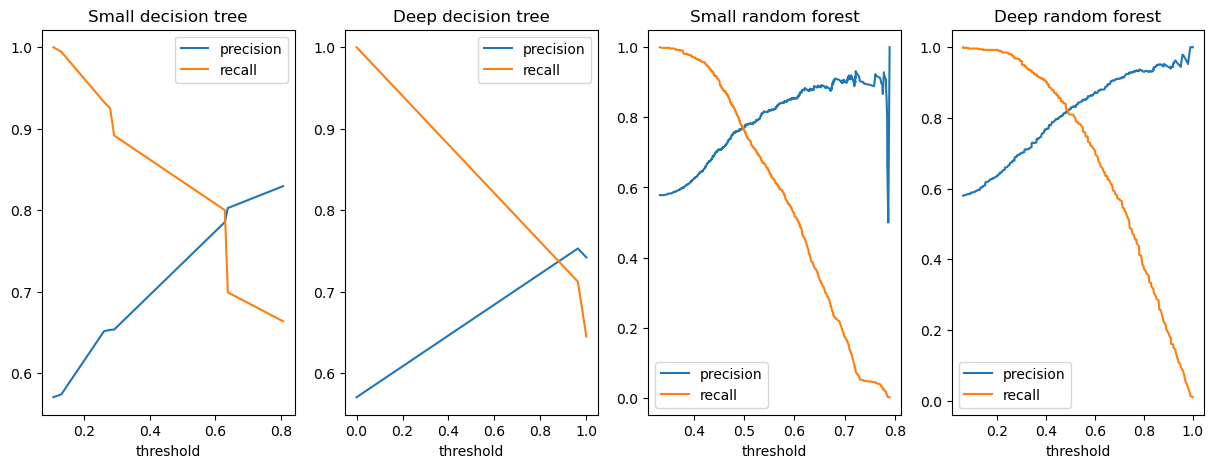

In [11]:
# Precision-Recall curves
precisions = []
recalls = []
threshs = []
labels = ['Small decision tree', 'Deep decision tree', 'Small random forest', 'Deep random forest']

for actual, predicted in zip([y_test, y_test, y_test, y_test,],
                             [st_probpred, dt_probpred, sf_probpred, df_probpred]):
    precision, recall, thresh = precision_recall_curve(actual, predicted)
    precisions.append(precision)
    recalls.append(recall)
    threshs.append(thresh)
plt.figure(figsize=(15, 5))

for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    plt.plot(threshs[i], precisions[i][:-1], label="precision")
    plt.plot(threshs[i], recalls[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

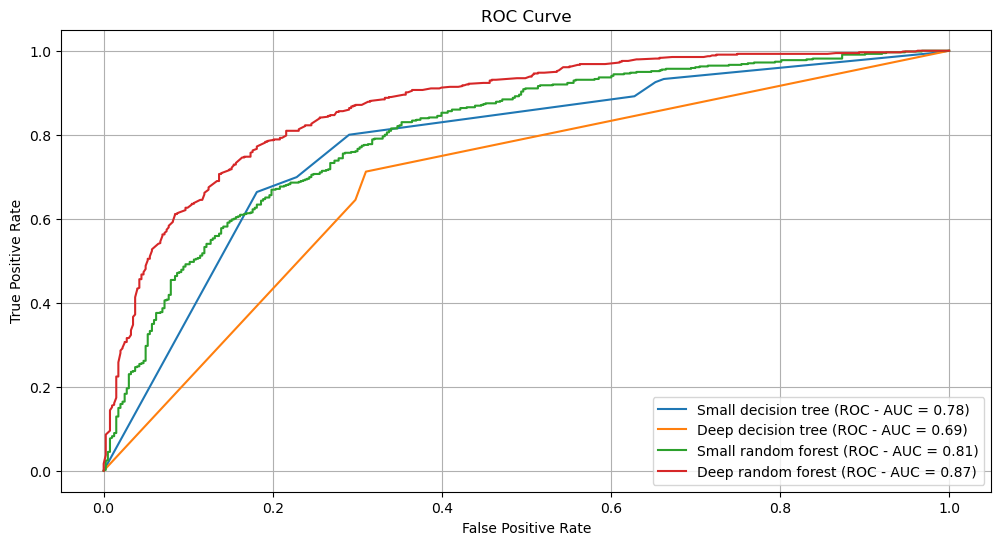

In [12]:
# ROC curves

plt.figure(figsize=(12, 6))
for actual, predicted, descr in zip([y_test, y_test, y_test, y_test,],
                                [st_probpred, dt_probpred, sf_probpred, df_probpred],
                                ['Small decision tree', 'Deep decision tree', 'Small random forest', 'Deep random forest']):
    fpr, tpr, thresh = roc_curve(actual, predicted)
    roc_auc = roc_auc_score(actual, predicted)
    plt.plot(fpr, tpr, label=descr + ' (ROC - AUC = ' + str(round(roc_auc, 2)) + ')')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.grid(True)

4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.

In [13]:
# Train a RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=50)
rf.fit(X_train, y_train)
threshold = 0.25

y_pred_probs = rf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs > threshold).astype(int)


In [14]:
# Calculate metrics
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)
rf_log_loss = log_loss(y_test, y_pred_probs)

In [16]:
# create a table with the results
all_metrics_1 = pd.DataFrame(np.array([rf_recall, rf_precision, rf_accuracy, rf_f1_score, rf_log_loss]).T,\
                             columns= ['RandomForestClassifier'],\
                             index=['Recall', 'Precison', 'Accuracy', 'F1 score', 'Log loss'])
all_metrics_1

,RandomForestClassifier
Recall,0.979439
Precison,0.665820
Accuracy,0.707889
F1 score,0.792738
Log loss,0.456841


The final recall is more than 0.95, which is what we were looking for